# Немного теории
Пусть есть популяция из $N$ особей, которая в каждый момент времени $t$ состоит из 3-х групп:

<ul>
<li>$S(t) -$ здоровые особи, которые могут заразиться</li>
<li>$I(t) -$ инфицированные особи, переносящие инфекцию</li>
<li>$R(t) -$ переболевшие + имеющие иммунитет + умершие</li>
</ul>
Тогда для $\forall  t$:
$$S(t) + I(t) + R(t) = N$$
$$\dot S + \dot I + \dot R = 0$$

Классическая $SIR -$ модель эпидемии имеет вид:
\begin{equation*}
\frac{dS}{dt} = - \frac{\beta S I}{N} \\
\frac{dI}{dt} = \frac{\beta S I}{N} - \gamma I \\
\frac{dR}{dt} = \gamma I
\end{equation*}
где $\beta -$ коэффициент заболеваемости, $\gamma -$ коэффициент выздоровления

Начальные условия:

\begin{equation*}
S(0) = N - I_0 \\
I(0) = I_0 \\
R(0) = 0 \\
\end{equation*}

# Реализация

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Population size and number of infected at first
N = 1000

# The SIR model differential equations.
def sir(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = - (beta * S * I) / N
    dIdt = (beta * S * I) / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [136]:
I_0 = 10
S_0 = N - I_0
R_0 = 0

beta = 0.2
gamma = 0.1
# initial and time
t = np.linspace(0, 200, 200)
y_0 = [S_0, I_0, R_0]

solve = odeint(sir, y_0, t, args=(N, beta, gamma))

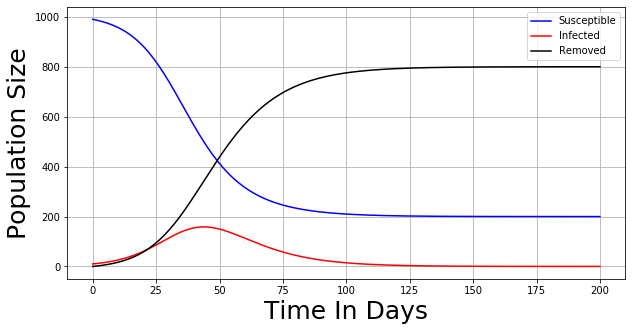

In [137]:
fontsize = 25
plt.rcParams['figure.figsize'] = [10, 5]

plt.plot(t, solve[:, 0], 'b', label='Susceptible')
plt.plot(t, solve[:, 1], 'r', label='Infected')
plt.plot(t, solve[:, 2], 'black', label='Removed')
plt.legend(loc='best')
plt.ylabel('Population Size', fontsize=fontsize)
plt.xlabel('Time In Days', fontsize=fontsize)
plt.grid()
plt.show()

# Эксперименты
Выясним, как зависит максимальное число зараженных от коэффициентов $\beta$ и $\gamma$. Это значение соответсвует равенству нулю производной $I$
\begin{equation}
\frac{dI}{dt} = I(t) \cdot (\frac{\beta S(t)}{N} - \gamma) = 0 \Leftrightarrow S(t) = \frac{\gamma N}{\beta}
\end{equation}


Выясним, как зависит максимальное число зараженных от коэффициентов $\beta$ и $\gamma$:  
Зафиксируем по очереди одно из значений, и будем варьировать другое

In [39]:
gamma_ = 0.2
beta_list = np.linspace(0, 2, 41)
max_infected = []
for beta_ in beta_list:
    solve = odeint(sir, y_0, t, args=(N, beta_, gamma_))
    max_infected.append(np.max(solve[:, 1]))

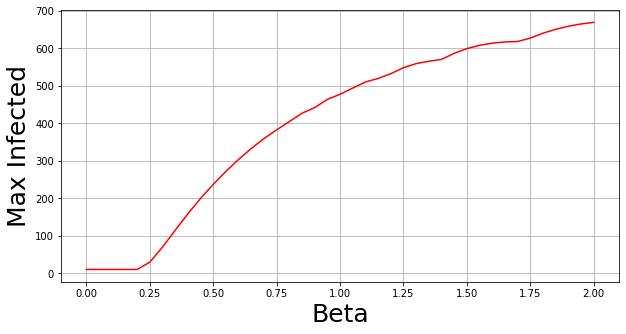

In [40]:
fontsize = 25
plt.rcParams['figure.figsize'] = [10, 5]

plt.plot(beta_list, max_infected, 'r')
plt.ylabel('Max Infected', fontsize=fontsize)
plt.xlabel('Beta', fontsize=fontsize)
plt.grid()
plt.show()

In [64]:
beta_ = 0.9
gamma_list = np.linspace(0, 2, 41)
max_infected = []
for gamma_ in gamma_list:
    solve = odeint(sir, y_0, t, args=(N, beta_, gamma_))
    max_infected.append(np.max(solve[:, 1]))

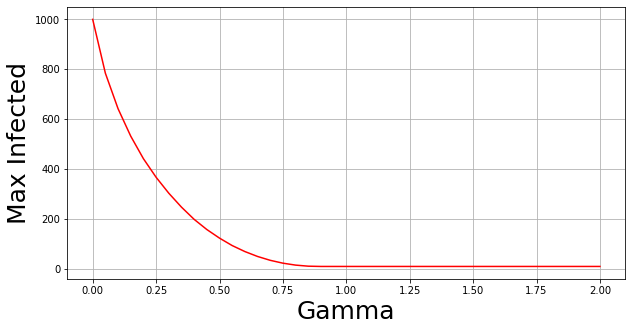

In [65]:
fontsize = 25
plt.rcParams['figure.figsize'] = [10, 5]

plt.plot(beta_list, max_infected, 'r', label='beta')
plt.ylabel('Max Infected', fontsize=fontsize)
plt.xlabel('Gamma', fontsize=fontsize)
plt.grid()
plt.show()

Таким образом, чем больше коэффициент заболеваемости $\beta$ и чем меньше коэффициент выздоровления $\gamma$, тем выше максимальное число инфицированных, что интуитивно можно заключить из названий коэффициентов и системы уравнений, что так же подтвержается экспериментом, в котором рассмотрены все пары $(\beta, \gamma)$ в неоктором диапазоне

In [138]:
table = []
max_infected = []
max_ = 0
for beta_ in beta_list:
    for gamma_ in gamma_list:
        solve = odeint(sir, y_0, t, args=(N, beta_, gamma_))
        if np.max(solve[:, 1]) > max_ and beta_ != 0 and gamma_ != 0:
            max_ = np.max(solve[:, 1])
            b, g = beta_, gamma_
max_, b, g

(879.4897530416923, 2.0, 0.05)

Теперь рассмотрим такие пары $(\beta, \gamma)$, что $\frac{\beta}{\gamma} = const$

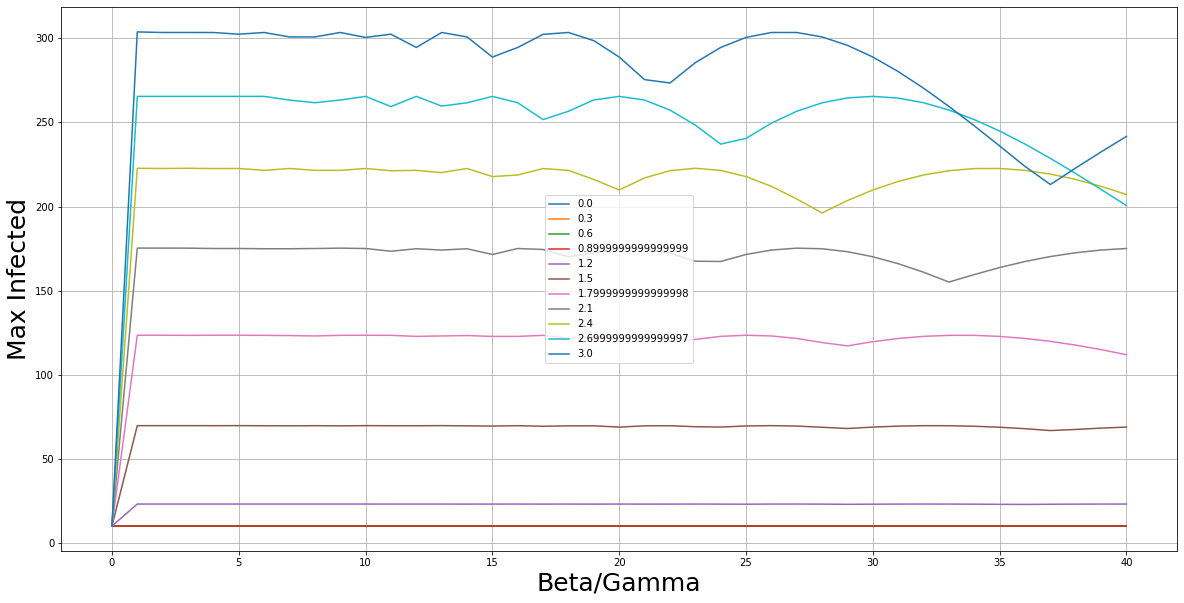

In [119]:
fontsize = 25
plt.rcParams['figure.figsize'] = [20, 10]

max_infected = []
ratio_list = np.linspace(0, 3, 11)
for ratio in ratio_list:
    temp_list = []
    for i in range(len(gamma_list)):
        solve = odeint(sir, y_0, t, args=(N, beta_list[i] * ratio, gamma_list[i]))
        temp_list.append(np.max(solve[:, 1]))
    plt.plot(range(len(temp_list)), temp_list, label=f'{beta_list[i] * ratio / gamma_list[i]}')
    plt.legend(loc='best')
plt.ylabel('Max Infected', fontsize=fontsize)
plt.xlabel('Beta/Gamma', fontsize=fontsize)
plt.grid()
plt.show()

Таким образом, если $\frac{\beta}{\gamma} < 1$, максимальное количество не превосходит 10, а максимальное число инфицированных примерно одинаковое для каждого значения $r = \frac{\beta}{\gamma}$